In [ ]:
'''import json
with open('./mlcourse-dota2-win-prediction/train_matches.jsonl', 'r') as f:
    jlines = list(f)'''

In [1]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
train = pd.read_csv('./mlcourse-dota2-win-prediction/train_features.csv')
y = pd.read_csv('./mlcourse-dota2-win-prediction/train_targets.csv')

train['target'] = y.radiant_win.astype('int8')

sns.set(rc={'figure.figsize':(21,8)})
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
to_drop = ['game_time', 'game_mode', 'lobby_type', 'chat_len']

In [3]:
hero_id_r_cols = [x for x in train.columns if 'hero_id' in x and x.startswith('r')]
hero_id_d_cols = [x for x in train.columns if 'hero_id' in x and x.startswith('d')]

In [4]:
train.loc[:, 'hero_ids_r'] = ''
train.loc[:, 'hero_ids_r'].astype('object')
train.loc[:, 'hero_ids_d'] = ''
train.loc[:, 'hero_ids_d'].astype('object')
train = train.astype('object')

In [5]:
%%time
r = []
d = []
for i, _ in train.iterrows(): 
    r.append(sorted(x for x in train.loc[i, hero_id_r_cols]))
    d.append(sorted(x for x in train.loc[i, hero_id_d_cols]))
train.loc[:, 'hero_ids_r'] = r
train.loc[:, 'hero_ids_d'] = d

Wall time: 40 s


In [6]:
%%time
r_hero_ids = []
for l1 in r:
    r_hero_ids.extend(l1)
d_hero_ids = []
for l2 in d:
    d_hero_ids.extend(l2)

Wall time: 17 ms


In [7]:
len(set(r_hero_ids)) == len(set(d_hero_ids))

True

In [8]:
has_hero = pd.DataFrame(index = train.index)
#launcg later
for id_ in set(r_hero_ids):
    has_hero[f'r_HasHeroId_{id_}'] = train['hero_ids_r'].apply(lambda x: 1 if id_ in x else 0)
    has_hero[f'd_HasHeroId_{id_}'] = train['hero_ids_d'].apply(lambda x: 1 if id_ in x else 0)

In [9]:
#train.drop(labels = [hero_id_r_cols, hero_id_d_cols], axis = 1, inplace=True)

In [10]:
r_kills_cols = [x for x in train.columns if 'kills' in x and x.startswith('r')]
r_deaths_cols = [x for x in train.columns if 'deaths' in x  and x.startswith('r')]
r_assists_cols = [x for x in train.columns if 'assists' in x  and x.startswith('r')]
r_denies_cols = [x for x in train.columns if 'denies' in x and x.startswith('r')]
r_gold_cols = [x for x in train.columns if 'gold' in x and x.startswith('r')]
r_lh_cols = [x for x in train.columns if 'lh' in x and x.startswith('r')]
r_xp_cols = [x for x in train.columns if 'xp' in x and x.startswith('r')]
r_health_cols = [x for x in train.columns if 'health' in x and 'max_health' not in x and x.startswith('r')]
r_max_health_cols = [x for x in train.columns if 'max_health' in x and x.startswith('r')]
r_max_mana_cols = [x for x in train.columns if 'max_mana' in x and x.startswith('r')]
r_level_cols = [x for x in train.columns if 'level' in x and x.startswith('r')]
r_stuns_cols = [x for x in train.columns if 'stuns' in x and x.startswith('r')]
r_creeps_stacked_cols = [x for x in train.columns if 'creeps_stacked' in x and x.startswith('r')]
r_camps_stacked_cols = [x for x in train.columns if 'camps_stacked' in x and x.startswith('r')]
r_rune_cols = [x for x in train.columns if 'rune' in x and x.startswith('r')]
r_firstblood_claimed_cols = [x for x in train.columns if 'firstblood_claimed' in x and x.startswith('r')]
r_denies_cols = [x for x in train.columns if 'denies' in x and x.startswith('r')]
r_towers_killed_cols = [x for x in train.columns if 'towers_killed' in x and x.startswith('r')]
r_roshans_killed_cols = [x for x in train.columns if 'roshans_killed' in x and x.startswith('r')]
r_obs_placed_cols = [x for x in train.columns if 'obs_placed' in x and x.startswith('r')]
r_sen_placed_cols = [x for x in train.columns if 'sen_placed' in x and x.startswith('r')]

d_kills_cols = [x for x in train.columns if 'kills' in x and x.startswith('d')]
d_deaths_cols = [x for x in train.columns if 'deaths' in x  and x.startswith('d')]
d_assists_cols = [x for x in train.columns if 'assists' in x  and x.startswith('d')]
d_denies_cols = [x for x in train.columns if 'denies' in x and x.startswith('d')]
d_gold_cols = [x for x in train.columns if 'gold' in x and x.startswith('d')]
d_lh_cols = [x for x in train.columns if 'lh' in x and x.startswith('d')]
d_xp_cols = [x for x in train.columns if 'xp' in x and x.startswith('d')]
d_health_cols = [x for x in train.columns if 'health' in x and 'max_health' not in x and x.startswith('d')]
d_max_health_cols = [x for x in train.columns if 'max_health' in x and x.startswith('d')]
d_max_mana_cols = [x for x in train.columns if 'max_mana' in x and x.startswith('d')]
d_level_cols = [x for x in train.columns if 'level' in x and x.startswith('d')]
d_stuns_cols = [x for x in train.columns if 'stuns' in x and x.startswith('d')]
d_creeps_stacked_cols = [x for x in train.columns if 'creeps_stacked' in x and x.startswith('d')]
d_camps_stacked_cols = [x for x in train.columns if 'camps_stacked' in x and x.startswith('d')]
d_rune_cols = [x for x in train.columns if 'rune' in x and x.startswith('d')]
d_firstblood_claimed_cols = [x for x in train.columns if 'firstblood_claimed' in x and x.startswith('d')]
d_denies_cols = [x for x in train.columns if 'denies' in x and x.startswith('d')]
d_towers_killed_cols = [x for x in train.columns if 'towers_killed' in x and x.startswith('d')]
d_roshans_killed_cols = [x for x in train.columns if 'roshans_killed' in x and x.startswith('d')]
d_obs_placed_cols = [x for x in train.columns if 'obs_placed' in x and x.startswith('d')]
d_sen_placed_cols = [x for x in train.columns if 'sen_placed' in x and x.startswith('d')]

In [11]:
team = pd.DataFrame(index = train.index)
team['r_kills'] = train[r_kills_cols].sum(1)
team['r_deaths'] = train[r_deaths_cols].sum(1)
team['r_assists'] = train[r_assists_cols].sum(1)
team['r_denies'] = train[r_denies_cols].sum(1)
team['r_gold'] = train[r_gold_cols].sum(1)
team['r_lh'] = train[r_lh_cols].sum(1)
team['r_xp'] = train[r_xp_cols].sum(1)
team['r_health'] = train[r_health_cols].sum(1)
team['r_max_health'] = train[r_max_health_cols].sum(1)
team['r_max_mana'] = train[r_max_mana_cols].sum(1)
team['r_creeps'] = train[r_creeps_stacked_cols].sum(1)
team['r_camps'] = train[r_camps_stacked_cols].sum(1)
team['r_rune_pickups'] = train[r_rune_cols].sum(1)
team['r_firstblood'] = train[r_firstblood_claimed_cols].sum(1)
team['r_denies'] = train[r_denies_cols].sum(1)
team['r_towers_killed'] = train[r_towers_killed_cols].sum(1)
team['r_roshans_killed'] = train[r_roshans_killed_cols].sum(1)
team['r_obs_placed'] = train[r_obs_placed_cols].sum(1)
team['r_sen_placed'] = train[r_sen_placed_cols].sum(1)

In [12]:
team['d_kills'] = train[d_kills_cols].sum(1)
team['d_deaths'] = train[d_deaths_cols].sum(1)
team['d_assists'] = train[d_assists_cols].sum(1)
team['d_denies'] = train[d_denies_cols].sum(1)
team['d_gold'] = train[d_gold_cols].sum(1)
team['d_lh'] = train[d_lh_cols].sum(1)
team['d_xp'] = train[d_xp_cols].sum(1)
team['d_health'] = train[d_health_cols].sum(1)
team['d_max_health'] = train[d_max_health_cols].sum(1)
team['d_max_mana'] = train[d_max_mana_cols].sum(1)
team['d_creeps'] = train[d_creeps_stacked_cols].sum(1)
team['d_camps'] = train[d_camps_stacked_cols].sum(1)
team['d_rune_pickups'] = train[d_rune_cols].sum(1)
team['d_firstblood'] = train[d_firstblood_claimed_cols].sum(1)
team['d_denies'] = train[d_denies_cols].sum(1)
team['d_towers_killed'] = train[d_towers_killed_cols].sum(1)
team['d_roshans_killed'] = train[d_roshans_killed_cols].sum(1)
team['d_obs_placed'] = train[d_obs_placed_cols].sum(1)
team['d_sen_placed'] = train[d_sen_placed_cols].sum(1)

In [13]:
team['kills_diff'] = team['r_kills'] - team['d_kills']
team['deaths_diff'] = team['r_deaths'] - team['d_deaths']
team['assists_diff'] = team['r_assists'] - team['d_assists']
team['denies_diff'] = team['r_denies'] - team['d_denies']
team['gold_diff'] = team['r_gold'] - team['d_gold']
team['lh_diff'] = team['r_lh'] - team['d_lh']
team['xp_diff'] = team['r_xp'] - team['d_xp']
team['health_diff'] = team['r_health'] - team['d_health']
team['max_health_diff'] = team['r_max_health'] - team['d_max_health']
team['max_mana_diff'] = team['r_max_mana'] - team['d_max_mana']
team['creeps_diff'] = team['r_creeps'] - team['d_creeps']
team['camps_diff'] = team['r_camps'] - team['d_camps']
team['rune_pickups_diff'] = team['r_rune_pickups'] - team['d_rune_pickups']
team['firstblood_diff'] = team['r_firstblood'] - team['d_firstblood']
team['denies_diff'] = team['r_denies'] - team['d_denies']
team['towers_killed_diff'] = team['r_towers_killed'] - team['d_towers_killed']
team['roshans_killed_diff'] = team['r_roshans_killed'] - team['d_roshans_killed']
team['obs_placed_diff'] = team['r_obs_placed'] - team['d_obs_placed']
team['sen_placed_diff'] = team['r_sen_placed'] - team['d_sen_placed']

In [14]:
#add player_skill

In [15]:

#train['team_kills_r'] = train[r_kills_cols].sum(1)
#train['team_kills_d'] = train[d_kills_cols].sum(1)

In [16]:
#train.drop(labels = [r_kills_cols, d_kills_cols], axis = 1, inplace=True)

In [17]:
'''q = train.loc[:,['r2_hero_id', 'r2_kills', 'target']]

q.r2_kills = q.r2_kills.astype('int16')

low = 20
up = 40

w = q[(q.r2_hero_id > low) & (q.r2_hero_id < up)]

sns.boxplot(y = 'r2_kills', x = 'r2_hero_id', hue = 'target', data=w)

sns.boxplot(y = 'r1_kills', x = 'r1_hero_id', hue = 'target', data=w)

#идея такая - для каждого героя посчитать среднюю статистику килы, асисты и т.д. - отдельная таблица через crosstab
#для каждого конкретного героя посчтить его отношение к средней статистике  - в цикле через слайсинг
r_kills_cols, hero_id_r_cols

a = r_kills_cols

r_kills_cols

a.extend(hero_id_r_cols)

hero_id_r_cols

a

t = train.loc[:, a]'''

"q = train.loc[:,['r2_hero_id', 'r2_kills', 'target']]\n\nq.r2_kills = q.r2_kills.astype('int16')\n\nlow = 20\nup = 40\n\nw = q[(q.r2_hero_id > low) & (q.r2_hero_id < up)]\n\nsns.boxplot(y = 'r2_kills', x = 'r2_hero_id', hue = 'target', data=w)\n\nsns.boxplot(y = 'r1_kills', x = 'r1_hero_id', hue = 'target', data=w)\n\n#идея такая - для каждого героя посчитать среднюю статистику килы, асисты и т.д. - отдельная таблица через crosstab\n#для каждого конкретного героя посчтить его отношение к средней статистике  - в цикле через слайсинг\nr_kills_cols, hero_id_r_cols\n\na = r_kills_cols\n\nr_kills_cols\n\na.extend(hero_id_r_cols)\n\nhero_id_r_cols\n\na\n\nt = train.loc[:, a]"

In [18]:
list(train.columns)

['match_id_hash',
 'game_time',
 'game_mode',
 'lobby_type',
 'objectives_len',
 'chat_len',
 'r1_hero_id',
 'r1_kills',
 'r1_deaths',
 'r1_assists',
 'r1_denies',
 'r1_gold',
 'r1_lh',
 'r1_xp',
 'r1_health',
 'r1_max_health',
 'r1_max_mana',
 'r1_level',
 'r1_x',
 'r1_y',
 'r1_stuns',
 'r1_creeps_stacked',
 'r1_camps_stacked',
 'r1_rune_pickups',
 'r1_firstblood_claimed',
 'r1_teamfight_participation',
 'r1_towers_killed',
 'r1_roshans_killed',
 'r1_obs_placed',
 'r1_sen_placed',
 'r2_hero_id',
 'r2_kills',
 'r2_deaths',
 'r2_assists',
 'r2_denies',
 'r2_gold',
 'r2_lh',
 'r2_xp',
 'r2_health',
 'r2_max_health',
 'r2_max_mana',
 'r2_level',
 'r2_x',
 'r2_y',
 'r2_stuns',
 'r2_creeps_stacked',
 'r2_camps_stacked',
 'r2_rune_pickups',
 'r2_firstblood_claimed',
 'r2_teamfight_participation',
 'r2_towers_killed',
 'r2_roshans_killed',
 'r2_obs_placed',
 'r2_sen_placed',
 'r3_hero_id',
 'r3_kills',
 'r3_deaths',
 'r3_assists',
 'r3_denies',
 'r3_gold',
 'r3_lh',
 'r3_xp',
 'r3_health',
 '

In [19]:
%%time
#использоватать координаты!
#подумать над метрикой координат
all_kills_cols = [x for x in train.columns if 'kills' in x and 'team_kills' not in x]
all_deaths_cols = [x for x in train.columns if 'deaths' in x]
all_assists_cols = [x for x in train.columns if 'assists' in x]
all_denies_cols = [x for x in train.columns if 'denies' in x]
all_gold_cols = [x for x in train.columns if 'gold' in x]
all_lh_cols = [x for x in train.columns if 'lh' in x]
all_xp_cols = [x for x in train.columns if 'xp' in x]
all_health_cols = [x for x in train.columns if 'health' in x and 'max_health' not in x]
all_max_health_cols = [x for x in train.columns if 'max_health' in x]
all_max_mana_cols = [x for x in train.columns if 'max_mana' in x]
all_level_cols = [x for x in train.columns if 'level' in x]
all_stuns_cols = [x for x in train.columns if 'stuns' in x]
all_creeps_stacked_cols = [x for x in train.columns if 'creeps_stacked' in x]
all_camps_stacked_cols = [x for x in train.columns if 'camps_stacked' in x]
all_rune_pickups_cols = [x for x in train.columns if 'rune_pickups' in x]
all_firstblood_claimed_cols = [x for x in train.columns if 'firstblood_claimed' in x]
all_denies_cols = [x for x in train.columns if 'denies' in x]
all_towers_killed_cols = [x for x in train.columns if 'towers_killed' in x]
all_roshans_killed_cols = [x for x in train.columns if 'roshans_killed' in x]
all_obs_placed_cols = [x for x in train.columns if 'obs_placed' in x]
all_sen_placed_cols = [x for x in train.columns if 'sen_placed' in x]

Wall time: 2 ms


In [20]:
%%time
#add picked position
kills = train[all_kills_cols].unstack()
hero_ids = train[hero_id_r_cols].unstack()
deaths= train[all_deaths_cols].unstack()
assists= train[all_assists_cols].unstack()
denies = train[all_denies_cols].unstack()
gold = train[all_gold_cols].unstack()
lh = train[all_lh_cols].unstack()
xp = train[all_xp_cols].unstack()
health = train[all_health_cols].unstack()
max_health = train[all_max_health_cols].unstack()
max_mana = train[all_max_mana_cols].unstack()
level = train[all_level_cols].unstack()
stuns = train[all_stuns_cols].unstack()
creeps_stacked = train[all_creeps_stacked_cols].unstack()
camps_stacked = train[all_camps_stacked_cols].unstack()
rune_pickups = train[all_rune_pickups_cols].unstack()
firstblood_claimed = train[all_firstblood_claimed_cols].unstack()
denies = train[all_denies_cols].unstack()
towers_killed = train[all_towers_killed_cols].unstack()
roshans_killed = train[all_roshans_killed_cols].unstack()
obs_placed = train[all_obs_placed_cols].unstack()
sen_placed = train[all_sen_placed_cols].unstack()

Wall time: 41.6 s


In [21]:
%%time
kills = kills.droplevel(level = 1).reset_index(drop = True)
kills.name = 'kills'
hero_ids = hero_ids.droplevel(level = 1).reset_index(drop = True)
hero_ids.name = 'hero_ids'
deaths = deaths.droplevel(level = 1).reset_index(drop = True)
deaths.name = 'deaths'
assists = assists.droplevel(level = 1).reset_index(drop = True)
assists.name = 'assists'
denies = denies.droplevel(level = 1).reset_index(drop = True)
denies.name = 'denies'
gold = gold.droplevel(level = 1).reset_index(drop = True)
gold.name = 'gold'
lh = lh.droplevel(level = 1).reset_index(drop = True)
lh.name = 'lh'
xp = xp.droplevel(level = 1).reset_index(drop = True)
xp.name = 'xp'
health = health.droplevel(level = 1).reset_index(drop = True)
health.name = 'health'
max_health = max_health.droplevel(level = 1).reset_index(drop = True)
max_health.name = 'max_health'
max_mana = max_mana.droplevel(level = 1).reset_index(drop = True)
max_mana.name = 'max_mana'
level = level.droplevel(level = 1).reset_index(drop = True)
level.name = 'level'
stuns = stuns.droplevel(level = 1).reset_index(drop = True)
stuns.name = 'stuns'
creeps_stacked = creeps_stacked.droplevel(level = 1).reset_index(drop = True)
creeps_stacked.name = 'creeps_stacked'
camps_stacked = camps_stacked.droplevel(level = 1).reset_index(drop = True)
camps_stacked.name = 'camps_stacked'
rune_pickups = rune_pickups.droplevel(level = 1).reset_index(drop = True)
rune_pickups.name = 'rune_pickups'
firstblood_claimed = firstblood_claimed.droplevel(level = 1).reset_index(drop = True)
firstblood_claimed.name = 'firstblood_claimed'
towers_killed = towers_killed.droplevel(level = 1).reset_index(drop = True)
towers_killed.name = 'towers_killed'
roshans_killed = roshans_killed.droplevel(level = 1).reset_index(drop = True)
roshans_killed.name = 'roshans_killed'
obs_placed = obs_placed.droplevel(level = 1).reset_index(drop = True)
obs_placed.name = 'obs_placed'
sen_placed = sen_placed.droplevel(level = 1).reset_index(drop = True)
sen_placed.name = 'sen_placed'

Wall time: 419 ms


In [22]:
%%time
q = pd.concat([kills, hero_ids, deaths, assists, denies, gold, lh, xp, health, max_health, max_mana, level, stuns, creeps_stacked, camps_stacked, rune_pickups,
              firstblood_claimed, towers_killed, roshans_killed, obs_placed, sen_placed], axis = 1)

Wall time: 94 ms


In [23]:
q = q.astype('float')

In [24]:
%%time
gq = q.groupby(['hero_ids'])['kills', 'deaths', 'assists', 'denies', 'gold', 'lh', 'xp', 'health', 'max_health', 'max_mana',
                        'level', 'stuns', 'creeps_stacked', 'camps_stacked', 'rune_pickups', 'firstblood_claimed', 'towers_killed', 'roshans_killed', 'obs_placed', 'sen_placed'].median()

Wall time: 131 ms


In [25]:
gq.columns

Index(['kills', 'deaths', 'assists', 'denies', 'gold', 'lh', 'xp', 'health',
       'max_health', 'max_mana', 'level', 'stuns', 'creeps_stacked',
       'camps_stacked', 'rune_pickups', 'firstblood_claimed', 'towers_killed',
       'roshans_killed', 'obs_placed', 'sen_placed'],
      dtype='object')

In [26]:
player_skill = pd.DataFrame(index = train.index)

In [30]:
%%time
import datetime
for j, _ in train.iterrows():
    if j%1000 == 0:
        print(datetime.datetime.now())
    for team in ['r', 'd']:
        for i in range(1, 6):
            for col in gq.columns:
                hero_id = train.loc[j, [f'{team}{i}_hero_id']]
                player_skill.loc[j,f'{team}{i}_{col}_ratio'] = train.loc[j, f'{team}{i}_{col}'] / gq.loc[hero_id, col].values[0]

2019-10-31 09:52:20.717814


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


2019-10-31 09:58:55.905274
2019-10-31 10:05:14.991247
2019-10-31 10:11:41.555742
2019-10-31 10:17:57.751745
2019-10-31 10:24:12.809774
2019-10-31 10:30:27.501747
2019-10-31 10:36:54.385178
2019-10-31 10:43:21.151845
2019-10-31 10:49:49.286473
2019-10-31 10:56:12.826834
2019-10-31 11:02:34.954854
2019-10-31 11:09:08.149863
2019-10-31 11:15:31.806137
2019-10-31 11:21:58.889578
2019-10-31 11:28:21.460593
2019-10-31 11:34:42.849459
2019-10-31 11:41:02.164589
2019-10-31 11:47:23.471620
2019-10-31 11:53:56.168991
2019-10-31 12:00:26.311645
2019-10-31 12:06:52.723810
2019-10-31 12:13:17.946032
2019-10-31 12:19:40.371085
2019-10-31 12:25:57.713087
2019-10-31 12:32:14.115190
2019-10-31 12:38:30.676190
2019-10-31 12:44:47.315165
2019-10-31 12:51:04.942162
2019-10-31 12:57:25.269245
2019-10-31 13:03:47.104904
2019-10-31 13:10:07.883904
2019-10-31 13:16:27.987903
2019-10-31 13:22:49.119908
2019-10-31 13:29:17.341391
2019-10-31 13:35:41.794042
2019-10-31 13:42:08.596054
2019-10-31 13:48:37.292058
2

In [32]:
player_skill.to_excel('player_skill.xlsx')

In [43]:
y.radiant_win.astype('int')

0        0
1        1
2        1
3        1
4        0
        ..
39670    0
39671    1
39672    0
39673    1
39674    1
Name: radiant_win, Length: 39675, dtype: int32

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(team, y.radiant_win.astype('int'))

In [48]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_validate = sc.transform(x_validate)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict_proba(x_validate)[:,1]
print(roc_auc_score(y_validate.values, y_pred))

C:\Users\Саша\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8115191282336679


In [27]:
has_hero.to_excel('has_hero.xlsx')

In [29]:
team.to_excel('team.xlsx')

In [75]:
player_skill2 = player_skill.copy()
player_skill2.replace([np.inf, -np.inf], np.nan, inplace=True)
player_skill2.fillna(0, inplace=True)

In [79]:
x = sc.fit_transform(team)

In [81]:
x = pd.DataFrame(x)

In [112]:
all_x = pd.concat([x, player_skill2, has_hero], axis = 1)

In [107]:
all_x = pd.concat([xplayer_skill2, has_hero], axis = 1)

In [ ]:
#hashero
#player_skill2
#team

In [108]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(max_iter=1000, n_jobs = -1, scoring='roc_auc')
lrcv.fit(all_x, y.radiant_win.astype('int'))

C:\Users\Саша\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [111]:
lrcv.scores_

{1: array([[0.77310845, 0.79206972, 0.81455197, 0.8221618 , 0.82377793,
         0.82378414, 0.8237847 , 0.82378421, 0.82378458, 0.82378398],
        [0.77565424, 0.7933836 , 0.8136369 , 0.81910242, 0.82068374,
         0.82090675, 0.8209062 , 0.82090682, 0.82090597, 0.82090707],
        [0.7698097 , 0.7880636 , 0.8093235 , 0.8160406 , 0.81672937,
         0.816386  , 0.81638556, 0.81638588, 0.81638538, 0.81638577]])}

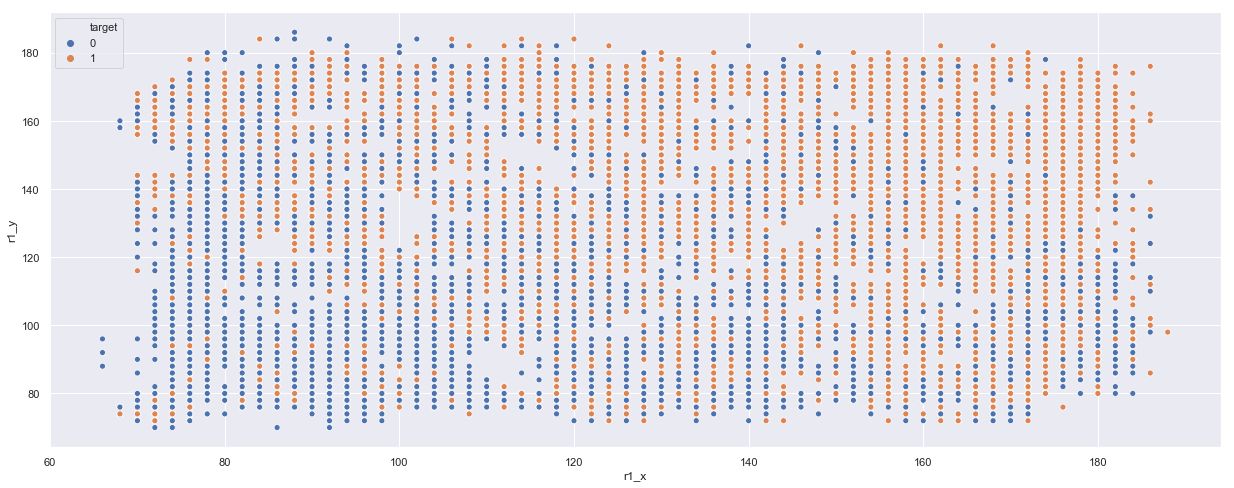

In [117]:
sns.scatterplot('r1_x', 'r1_y', hue = 'target', data = train)

In [115]:
train['r1_x'].value_counts()

78     1711
76     1412
176    1326
122    1278
174    1267
       ... 
184      99
186      18
68       14
66        3
188       1
Name: r1_x, Length: 62, dtype: int64

In [110]:
kills = train[r_kills_cols].unstack()

r1_kills  0         0
          1         7
          2         0
          3         1
          4         0
                   ..
r5_kills  39670     4
          39671     0
          39672     0
          39673    21
          39674    10
Length: 198375, dtype: object

r1_hero_id  0         11
            1         15
            2        101
            3         14
            4         42
                    ... 
r5_hero_id  39670     63
            39671     63
            39672     49
            39673     23
            39674     68
Length: 198375, dtype: object

In [95]:
r_kills_cols, hero_id_r_cols

(['r1_kills',
  'r2_kills',
  'r3_kills',
  'r4_kills',
  'r5_kills',
  'r1_hero_id',
  'r2_hero_id',
  'r3_hero_id',
  'r4_hero_id',
  'r5_hero_id'],
 ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id'])

In [91]:
t.unstack()

r1_kills    0         0
            1         7
            2         0
            3         1
            4         0
                     ..
r5_hero_id  39670    63
            39671    63
            39672    49
            39673    23
            39674    68
Length: 396750, dtype: object

In [89]:
pd.melt(t, id_vars = hero_id_r_cols)

,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,variable,value
0,11,78,14,59,77,r1_kills,0
1,15,96,27,63,89,r1_kills,7
2,101,51,44,49,53,r1_kills,0
3,14,99,101,26,41,r1_kills,1
4,42,69,27,104,65,r1_kills,0
...,...,...,...,...,...,...,...
198370,3,49,7,74,63,r5_kills,4
198371,14,80,12,3,63,r5_kills,0
198372,63,27,110,10,49,r5_kills,0
198373,22,32,81,91,23,r5_kills,21


In [148]:
list(train.columns)

['match_id_hash',
 'game_time',
 'game_mode',
 'lobby_type',
 'objectives_len',
 'chat_len',
 'r1_hero_id',
 'r1_kills',
 'r1_deaths',
 'r1_assists',
 'r1_denies',
 'r1_gold',
 'r1_lh',
 'r1_xp',
 'r1_health',
 'r1_max_health',
 'r1_max_mana',
 'r1_level',
 'r1_x',
 'r1_y',
 'r1_stuns',
 'r1_creeps_stacked',
 'r1_camps_stacked',
 'r1_rune_pickups',
 'r1_firstblood_claimed',
 'r1_teamfight_participation',
 'r1_towers_killed',
 'r1_roshans_killed',
 'r1_obs_placed',
 'r1_sen_placed',
 'r2_hero_id',
 'r2_kills',
 'r2_deaths',
 'r2_assists',
 'r2_denies',
 'r2_gold',
 'r2_lh',
 'r2_xp',
 'r2_health',
 'r2_max_health',
 'r2_max_mana',
 'r2_level',
 'r2_x',
 'r2_y',
 'r2_stuns',
 'r2_creeps_stacked',
 'r2_camps_stacked',
 'r2_rune_pickups',
 'r2_firstblood_claimed',
 'r2_teamfight_participation',
 'r2_towers_killed',
 'r2_roshans_killed',
 'r2_obs_placed',
 'r2_sen_placed',
 'r3_hero_id',
 'r3_kills',
 'r3_deaths',
 'r3_assists',
 'r3_denies',
 'r3_gold',
 'r3_lh',
 'r3_xp',
 'r3_health',
 '

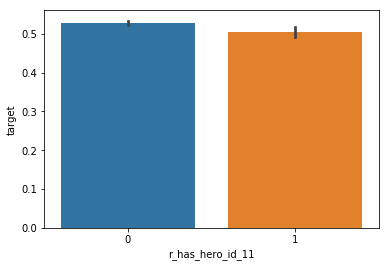

In [115]:
sns.barplot(x = 'r_has_hero_id_11', y = 'target', data = train)

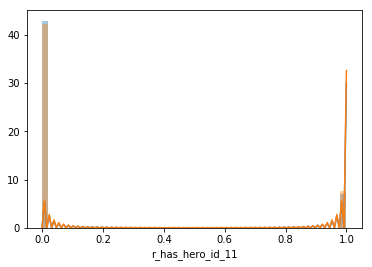

In [116]:
sns.distplot(train['r_HasHeroId_11'][train.target ==1])
sns.distplot(train['r_has_hero_id_11'][train.target ==0])

In [ ]:
train.groupby('target')['game_time'].agg(np.median)

In [ ]:
sns.stripplot(x = 'game_time', y = 'target', data = train)

In [ ]:
sns.scatterplot(x = 'game_time', y = 'target', data = train, hue=  )

In [ ]:
sns.countplot(data = train[firstblood_claimed_cols], x = train.d5_firstblood_claimed, hue = train.target)

In [ ]:
list(train.columns)

In [ ]:
train[firstblood_claimed_cols].sum(axis = 1)

In [ ]:
firstblood_claimed_cols = [x for x in train.columns if 'firstblood_claimed' in x]

In [ ]:
firstblood_claimed_cols

In [ ]:
train[int_cols].nunique().sort_values()

In [ ]:
int_cols = [x for x in train.columns if train[x].dtype =='int64']

In [ ]:
set(train['match_id_hash'] == y['match_id_hash'])

In [ ]:
train['match_id_hash'].nunique()

In [ ]:
[x for x in train.columns if train[x].dtype =='object']

In [ ]:
y

In [ ]:
train.info()

In [ ]:
train.describe()